In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib as mpl
# Ensure text is saved as editable text in SVG
mpl.rcParams['svg.fonttype'] = 'none'
# Set global font to Arial
mpl.rcParams['font.family'] = 'Arial'

C:\Users\laan\AppData\Local\Temp\ipykernel_41044\753716422.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


✅ Black & white boxplot saved as SVG/PNG with stats CSV


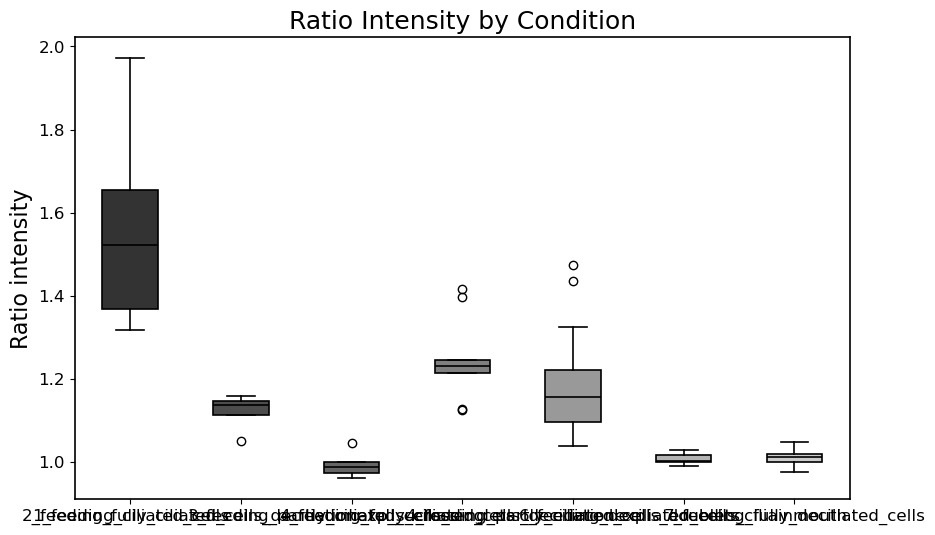

In [2]:
# Path to the folder with CSV files
folder = "W:\\Users\\Daphne\\WT_RESULTS\\WT_feeding\\"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder, "*.csv"))

# Dictionary to hold data
data_dict = {}

# Read each CSV and extract "Ratio intensity" column
for file in csv_files:
    condition_name = os.path.splitext(os.path.basename(file))[0]  # filename without extension
    df = pd.read_csv(file)

    if "Ratio intensity" in df.columns:
        data_dict[condition_name] = df["Ratio intensity"].dropna()
    else:
        print(f"Warning: 'Ratio intensity' not found in {file}")



# sort data_dict by keys
data_dict = dict(sorted(data_dict.items()))

# sub data_dict to only first 4 conditions for plotting
data_dict_wt = {k: data_dict[k] for k in list(data_dict.keys())[:1]}
data_dict_sucrose = {k: data_dict[k] for k in list(data_dict.keys())[1:3]}
data_dict_etoh = {k: data_dict[k] for k in list(data_dict.keys())[3:]}

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_dict.items()]))

# Set style: white background, black axes
plt.style.use("default")
plt.rcParams.update({
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "font.size": 14
})

# Create boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Grayscale colors from dark to bright
num_conditions = len(data_dict)
greys = [str(x) for x in np.linspace(0.2, 0.8, num_conditions)]  # 0=black, 1=white

# Plot each condition manually to color boxes
box = ax.boxplot(
    [data_dict[k] for k in data_dict.keys()],
    patch_artist=True,
    labels=list(data_dict.keys())
)


# for i, (key, values) in enumerate(data_dict.items(), start=1):
#     ax.scatter(np.random.normal(i, 0.04, size=len(values)), values, alpha=1.0, color='red', s=20)


# Apply grayscale fill to boxes
for patch, color in zip(box['boxes'], greys):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
    patch.set_linewidth(1.2)

# Style other elements
for element in ['whiskers', 'caps', 'medians']:
    for line in box[element]:
        line.set_color("black")
        line.set_linewidth(1.2)

ax.set_ylabel("Ratio intensity", fontsize=16)
ax.set_title("Ratio Intensity by Condition", fontsize=18)

# name x ticks manually
# ax.set_xticklabels(list(data_dict.keys()), rotation=45, ha='right')
# ax.set_xticklabels(('1', '2', '3', '4'))

# Save plot
fig.savefig(os.path.join(folder, "ratio_intensity_boxplot.svg"), format="svg", bbox_inches="tight")
fig.savefig(os.path.join(folder, "ratio_intensity_boxplot.png"), format="png", dpi=300, bbox_inches="tight")

# Save boxplot stats to CSV
stats = plot_df.describe().transpose()
stats.to_csv(os.path.join(folder, "ratio_intensity_boxplot_stats.csv"))

print("✅ Black & white boxplot saved as SVG/PNG with stats CSV")



C:\Users\laan\AppData\Local\Temp\ipykernel_41044\456107558.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('all cilia - control', 'cilia in both zones - sucrose', 'only singlets + mouth', 'cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)


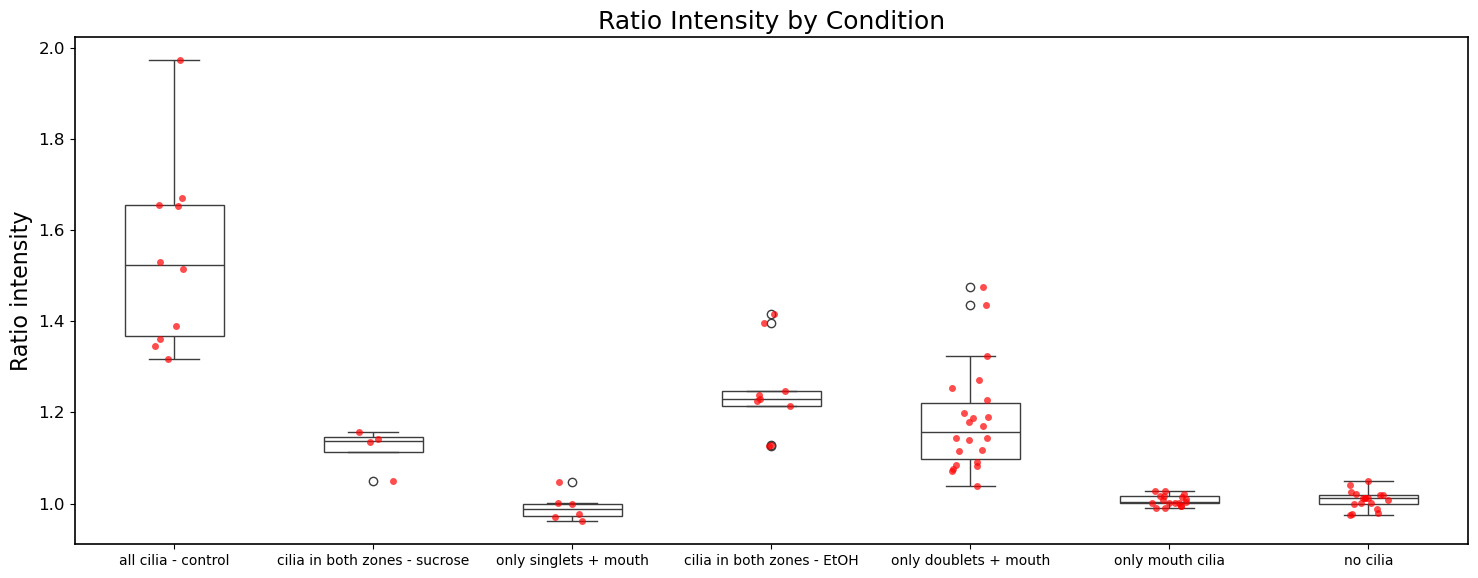

In [3]:
plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 1, 1, facecolor='white')
sns.boxplot(data=data_dict, color='white', width=0.5)
sns.stripplot(data=data_dict, color='red', size=5, jitter=True, alpha=0.7)
plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
# plt.xticks(('all cilia - control', 'cilia in both zones', 'only doublets left', 'no cilia'))
ax.set_xticklabels(('all cilia - control', 'cilia in both zones - sucrose', 'only singlets + mouth', 'cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()

# Save boxplot stats to CSV
stats = plot_df.describe().transpose()
stats.to_csv(os.path.join(folder, "ratio_intensity_boxplot_stats.csv"))

C:\Users\laan\AppData\Local\Temp\ipykernel_41044\3848426613.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('all cilia - control', 'cilia in both zones - sucrose', 'only singlets + mouth', 'cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)
C:\Users\laan\AppData\Local\Temp\ipykernel_41044\3848426613.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(('cilia in both zones - sucrose', 'only singlets + mouth'), fontsize=10)
C:\Users\laan\AppData\Local\Temp\ipykernel_41044\3848426613.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(('cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fonts

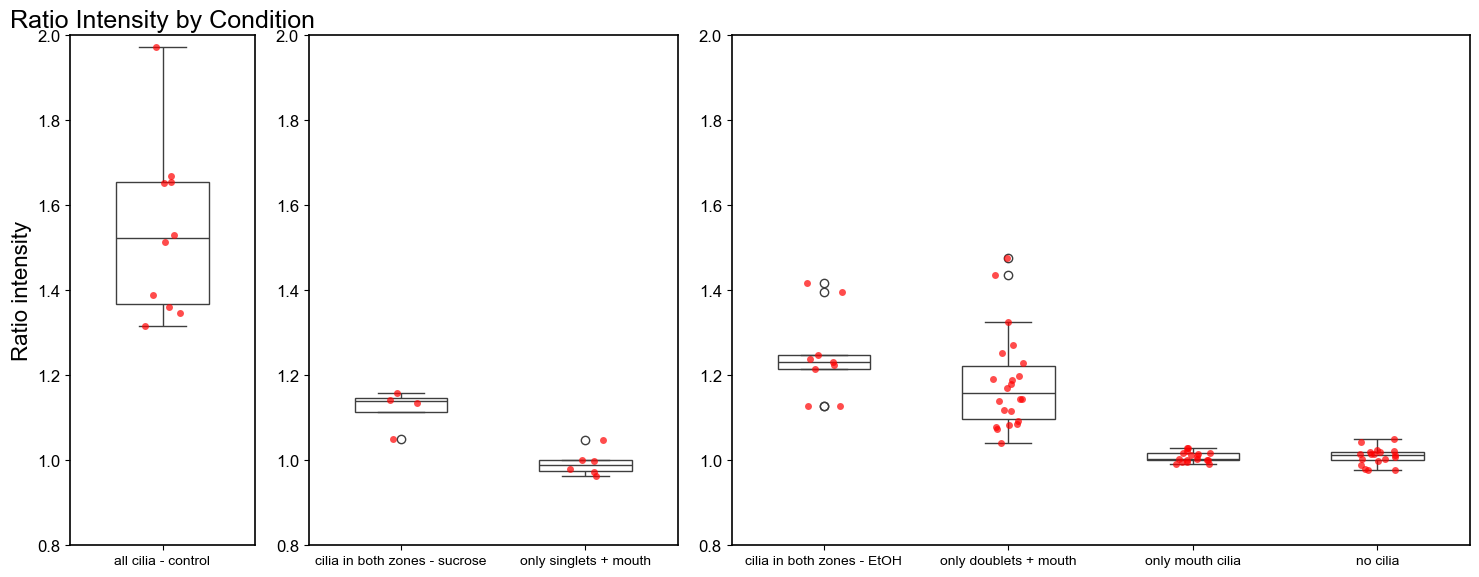

In [4]:
from matplotlib import gridspec
import matplotlib as mpl
# Ensure text is saved as editable text in SVG
mpl.rcParams['svg.fonttype'] = 'none'
# Set global font to Arial
mpl.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 4])

# ax = plt.subplot(1, 3, 1, facecolor='white')
ax = plt.subplot(gs[0])
sns.boxplot(data=data_dict_wt, color='white', width=0.5)
sns.stripplot(data=data_dict_wt, color='red', size=5, jitter=True, alpha=0.7)
plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
plt.ylim(0.8, 2)
# plt.xticks(('all cilia - control', 'cilia in both zones', 'only doublets left', 'no cilia'))
ax.set_xticklabels(('all cilia - control', 'cilia in both zones - sucrose', 'only singlets + mouth', 'cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)

ax2 = plt.subplot(1, 3, 2, facecolor='white')
sns.boxplot(data=data_dict_sucrose, color='white', width=0.5)
sns.stripplot(data=data_dict_sucrose, color='red', size=5, jitter=True, alpha=0.7)
plt.ylim(0.8, 2)
ax2.set_xticklabels(('cilia in both zones - sucrose', 'only singlets + mouth'), fontsize=10)

ax3 = plt.subplot(1, 3, 3, facecolor='white')
sns.boxplot(data=data_dict_etoh, color='white', width=0.5)
sns.stripplot(data=data_dict_etoh, color='red', size=5, jitter=True, alpha=0.7)
plt.ylim(0.8, 2)
ax3.set_xticklabels(('cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_separate.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_separate.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()

# Save boxplot stats to CSV
stats = plot_df.describe().transpose()
stats.to_csv(os.path.join(folder, "ratio_intensity_boxplot_stats.csv"))

C:\Users\laan\AppData\Local\Temp\ipykernel_41044\501876585.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('all cilia - control', 'cilia in both zones - sucrose', 'only singlets + mouth', 'cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)
C:\Users\laan\AppData\Local\Temp\ipykernel_41044\501876585.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(('cilia in both zones - sucrose', 'only singlets + mouth'), fontsize=10)
C:\Users\laan\AppData\Local\Temp\ipykernel_41044\501876585.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(('cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize

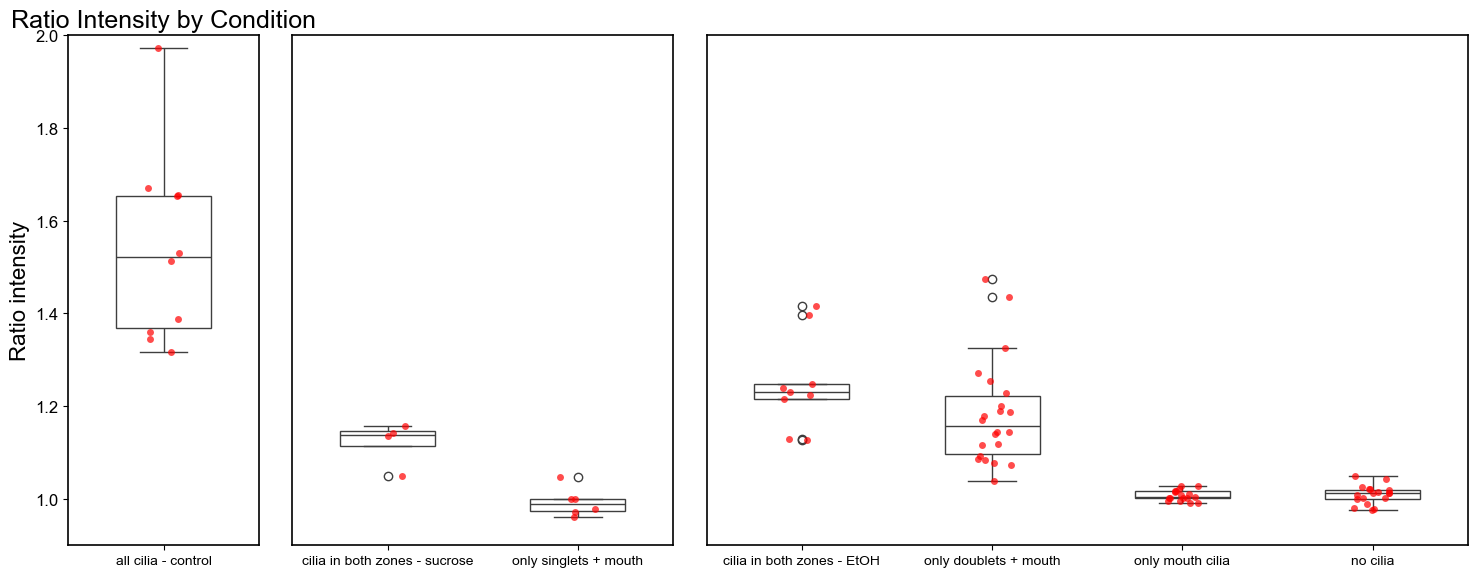

In [5]:
from matplotlib import gridspec

plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 4])

# ax = plt.subplot(1, 3, 1, facecolor='white')
ax = plt.subplot(gs[0])
sns.boxplot(data=data_dict_wt, color='white', width=0.5)
sns.stripplot(data=data_dict_wt, color='red', size=5, jitter=True, alpha=0.7)
plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
plt.ylim(0.9, 2)
# plt.xticks(('all cilia - control', 'cilia in both zones', 'only doublets left', 'no cilia'))
ax.set_xticklabels(('all cilia - control', 'cilia in both zones - sucrose', 'only singlets + mouth', 'cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)

ax2 = plt.subplot(1, 3, 2, facecolor='white')
sns.boxplot(data=data_dict_sucrose, color='white', width=0.5)
sns.stripplot(data=data_dict_sucrose, color='red', size=5, jitter=True, alpha=0.7)
plt.ylim(0.9, 2)
ax2.set_ylabel(None)
ax2.tick_params(axis='y', left=False, labelleft=False)
ax2.set_xticklabels(('cilia in both zones - sucrose', 'only singlets + mouth'), fontsize=10)

ax3 = plt.subplot(1, 3, 3, facecolor='white')
sns.boxplot(data=data_dict_etoh, color='white', width=0.5)
sns.stripplot(data=data_dict_etoh, color='red', size=5, jitter=True, alpha=0.7)
plt.ylim(0.9, 2)
ax3.set_ylabel(None)
ax3.tick_params(axis='y', left=False, labelleft=False)
ax3.set_xticklabels(('cilia in both zones - EtOH', 'only doublets + mouth', 'only mouth cilia', 'no cilia'), fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_separate_2.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_separate_2.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()

# Save boxplot stats to CSV
stats = plot_df.describe().transpose()
stats.to_csv(os.path.join(folder, "ratio_intensity_boxplot_stats.csv"))



In [6]:
print(data_dict_wt)

{'1_feeding_ciliated_cells': 0    1.360437
1    1.388636
2    1.669673
3    1.652541
4    1.513878
5    1.971996
6    1.654569
7    1.345052
8    1.316458
9    1.530784
Name: Ratio intensity, dtype: float64}


In [7]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Load data as before
folder = "W:\\Users\\Daphne\\WT_RESULTS\\WT_feeding\\"
csv_files = glob.glob(os.path.join(folder, "*.csv"))
data_dict = {}
for file in csv_files:
    condition_name = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    if "Ratio intensity" in df.columns:
        data_dict[condition_name] = df["Ratio intensity"].dropna()
    else:
        print(f"Warning: 'Ratio intensity' not found in {file}")
data_dict = dict(sorted(data_dict.items()))

# 2. Combine conditions as needed (example: combine 'condA' and 'condB' into 'CombinedAB')
# Replace with your actual condition names
combined_conditions = {
    'CombinedAB': ['condA', 'condB'],
    # Add more combinations as needed
}
for new_name, conds in combined_conditions.items():
    combined = pd.concat([data_dict[c] for c in conds if c in data_dict])
    data_dict[new_name] = combined
    for c in conds:
        data_dict.pop(c, None)

# 3. Assign marker shapes per condition
# Matplotlib marker styles: 'o', 's', 'D', '^', 'v', '<', '>', 'P', '*', etc.
condition_markers = {
    'CombinedAB': 'o',
    'condC': 's',
    'condD': 'D',
    # Add all your conditions and assign a marker
}
# Ensure all conditions have a marker
for cond in data_dict:
    if cond not in condition_markers:
        condition_markers[cond] = 'o'  # default

# 4. Prepare long-form DataFrame for seaborn
plot_data = []
for cond, values in data_dict.items():
    for v in values:
        plot_data.append({'Condition': cond, 'Value': v, 'Marker': condition_markers[cond]})
plot_df = pd.DataFrame(plot_data)

# 5. Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Value', data=plot_df, color='white', width=0.5, showfliers=False)

# Overlay stripplot with per-condition marker
for cond in plot_df['Condition'].unique():
    subset = plot_df[plot_df['Condition'] == cond]
    sns.stripplot(
        x='Condition', y='Value', data=subset,
        marker=condition_markers[cond], color='red', size=6, jitter=True, alpha=0.7
    )

plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_combined.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_combined.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()

ValueError: No objects to concatenate

In [8]:
# List all condition names from CSV files in the folder

import os
import glob

folder = "W:\\Users\\Daphne\\WT_RESULTS\\WT_feeding\\"
csv_files = glob.glob(os.path.join(folder, "*.csv"))

condition_names = [os.path.splitext(os.path.basename(f))[0] for f in csv_files]
print("Condition names found in folder:")
for name in condition_names:
    print(name)

Condition names found in folder:
3_feeding_partly_ciliated_cells_singlets
2_feeding_fully_ciliated_cells_deciliationexp_sucrose
4_feeding_partly_ciliated_cells_doublets
ratio_intensity_boxplot_stats
4_feeding_fully_ciliated_cells_deciliationexp
7_feeding_fully_deciliated_cells
1_feeding_ciliated_cells
6_feeding_deciliated_cells_ciliainmouth


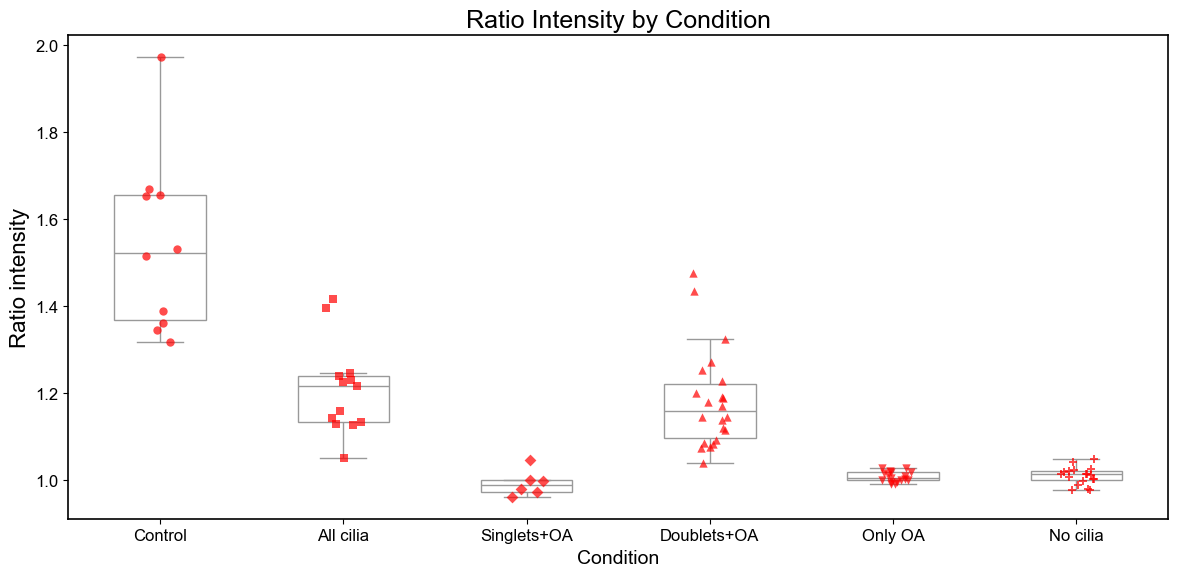

In [14]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder = "W:\\Users\\Daphne\\WT_RESULTS\\WT_feeding\\"
csv_files = glob.glob(os.path.join(folder, "*.csv"))
data_dict = {}
for file in csv_files:
    condition_name = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    if "Ratio intensity" in df.columns:
        data_dict[condition_name] = df["Ratio intensity"].dropna()
    else:
        print(f"Warning: 'Ratio intensity' not found in {file}")
data_dict = dict(sorted(data_dict.items()))

combined_conditions = {
    'Control': ['1_feeding_ciliated_cells'],
    'All cilia': ['4_feeding_fully_ciliated_cells_deciliationexp', '2_feeding_fully_ciliated_cells_deciliationexp_sucrose'],
    'Singlets+OA': ['3_feeding_partly_ciliated_cells_singlets'],
    'Doublets+OA': ['4_feeding_partly_ciliated_cells_doublets'],
    'Only OA': ['6_feeding_deciliated_cells_ciliainmouth'],
    'No cilia': ['7_feeding_fully_deciliated_cells'],
    # Do not include empty lists!
}

plot_data_dict = {}
for new_name, conds in combined_conditions.items():
    valid_conds = [c for c in conds if c in data_dict]
    if valid_conds:
        combined = pd.concat([data_dict[c] for c in valid_conds])
        plot_data_dict[new_name] = combined
    else:
        print(f"Warning: No valid conditions to combine for '{new_name}', skipping.")

condition_markers = {
    'Control': 'o',
    'All cilia': 's',
    'Singlets+OA': 'D',
    'Doublets+OA': '^',
    'Only OA': 'v',
    'No cilia': 'P',
}
for cond in plot_data_dict:
    if cond not in condition_markers:
        condition_markers[cond] = 'o'

plot_data = []
for cond, values in plot_data_dict.items():
    for v in values:
        plot_data.append({'Condition': cond, 'Value': v, 'Marker': condition_markers[cond]})
plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Value', data=plot_df, color='white', width=0.5, showfliers=False)
for cond in plot_df['Condition'].unique():
    subset = plot_df[plot_df['Condition'] == cond]
    sns.stripplot(
        x='Condition', y='Value', data=subset,
        marker=condition_markers[cond], color='red', size=6, jitter=True, alpha=0.7
    )
plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_combined.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_combined.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()

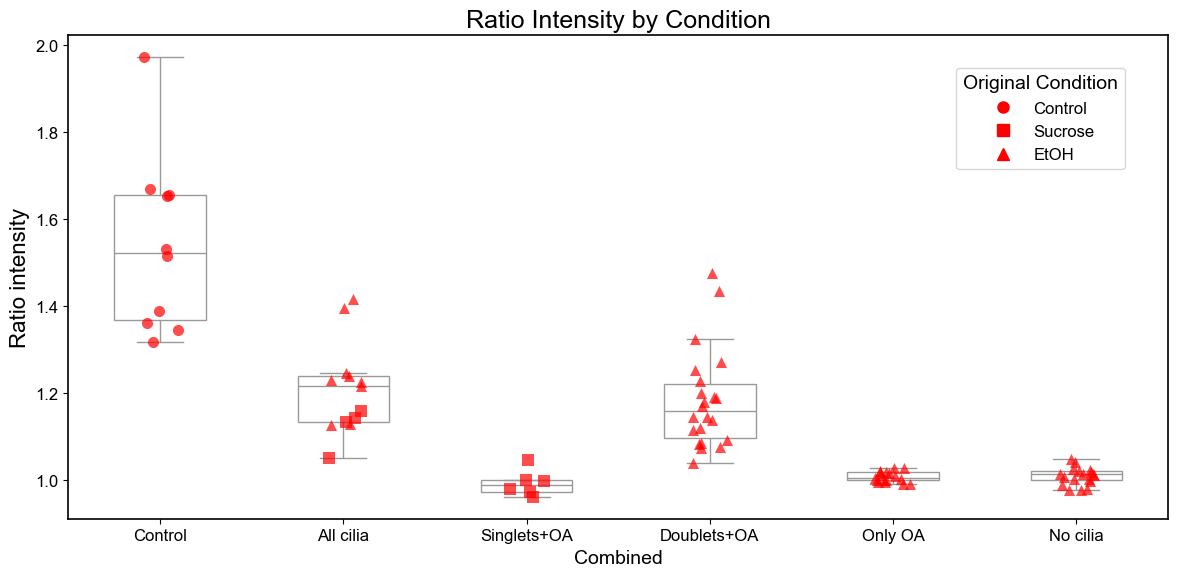

In [24]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

folder = "W:\\Users\\Daphne\\WT_RESULTS\\WT_feeding\\"
csv_files = glob.glob(os.path.join(folder, "*.csv"))
data_dict = {}
for file in csv_files:
    condition_name = os.path.splitext(os.path.basename(file))[0]
    df = pd.read_csv(file)
    if "Ratio intensity" in df.columns:
        data_dict[condition_name] = df["Ratio intensity"].dropna()
    else:
        print(f"Warning: 'Ratio intensity' not found in {file}")
data_dict = dict(sorted(data_dict.items()))

# Assign marker per original condition (from CSV)
condition_markers_raw = {
    '1_feeding_ciliated_cells': 'o',   # control
    '2_feeding_fully_ciliated_cells_deciliationexp_sucrose': 's',  # sucrose
    '3_feeding_partly_ciliated_cells_singlets': 's',               # sucrose
    '4_feeding_fully_ciliated_cells_deciliationexp': '^',          # EtOH
    '4_feeding_partly_ciliated_cells_doublets': '^',               # EtOH
    '6_feeding_deciliated_cells_ciliainmouth': '^',                # EtOH
    '7_feeding_fully_deciliated_cells': '^',                       # EtOH
    # Add all your original conditions here
}

# Define combined boxes
combined_conditions = {
    'Control': ['1_feeding_ciliated_cells'],
    'All cilia': ['4_feeding_fully_ciliated_cells_deciliationexp', '2_feeding_fully_ciliated_cells_deciliationexp_sucrose'],
    'Singlets+OA': ['3_feeding_partly_ciliated_cells_singlets'],
    'Doublets+OA': ['4_feeding_partly_ciliated_cells_doublets'],
    'Only OA': ['6_feeding_deciliated_cells_ciliainmouth'],
    'No cilia': ['7_feeding_fully_deciliated_cells'],
}

# Build long-form DataFrame: each row = value, original condition, marker, combined box
plot_data = []
for box_name, conds in combined_conditions.items():
    valid_conds = [c for c in conds if c in data_dict]
    for cond in valid_conds:
        marker = condition_markers_raw.get(cond, 'o')
        for v in data_dict[cond]:
            plot_data.append({
                'Combined': box_name,
                'Original': cond,
                'Value': v,
                'Marker': marker
            })
plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Combined', y='Value', data=plot_df, color='white', width=0.5, showfliers=False)

# Overlay stripplot: plot each original condition separately, so markers can differ within a box
for box_name, conds in combined_conditions.items():
    for cond in conds:
        marker = condition_markers_raw.get(cond, 'o')
        subset = plot_df[(plot_df['Combined'] == box_name) & (plot_df['Original'] == cond)]
        if not subset.empty:
            sns.stripplot(
                x='Combined', y='Value', data=subset,
                marker=marker, color='red', size=8, jitter=True, alpha=0.7
            )

# Add custom legend for markers
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Control', markerfacecolor='red', markersize=8, markeredgecolor='red'),
    Line2D([0], [0], marker='s', color='w', label='Sucrose', markerfacecolor='red', markersize=8, markeredgecolor='red'),
    Line2D([0], [0], marker='^', color='w', label='EtOH', markerfacecolor='red', markersize=8, markeredgecolor='red'),
]
plt.legend(handles=legend_elements, title='Original Condition', bbox_to_anchor=(0.8, 0.95), loc='upper left')

plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_combined.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot_combined.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()